# Assignment 2

Answer questions 1-4 using the network `G1`, a network of friendships at a university department. Each node corresponds to a person, and an edge indicates friendship. 

*The network has been loaded as networkx graph object `G1`.*

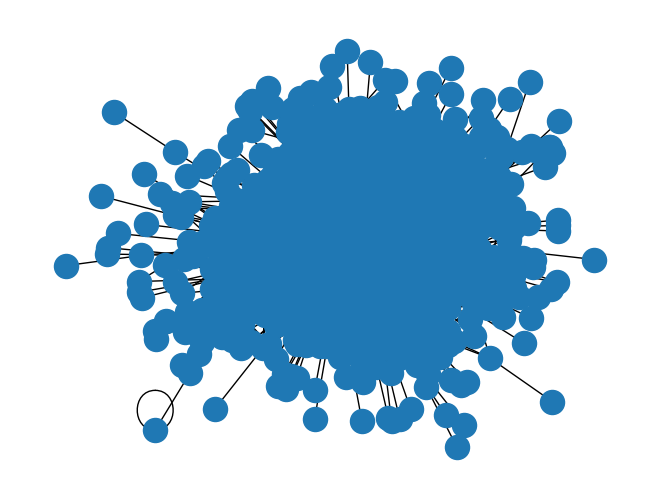

In [3]:
%matplotlib inline
import networkx as nx

G1 = nx.read_gml('../data/homework2_assignment2/friendships.gml')
nx.draw(G1)

### Question 1 (2 pkt)

Find the degree centrality, closeness centrality, and normalized betweeness centrality (excluding endpoints) of node 100.

In [29]:
# Your Answer Here

degree_centrality = nx.degree_centrality(G1).get(100)
closeness_centrality = nx.closeness_centrality(G1).get(100)
betweenness_centrality = nx.betweenness_centrality(G1, normalized=True, endpoints=False).get(100)
print(f"Degree centrality of node 100: {degree_centrality} \nCloseness centrality of node 100: {closeness_centrality} \nBetweenness centrality of node 100: {betweenness_centrality}")


Degree centrality of node 100: 0.0026501766784452294 
Closeness centrality of node 100: 0.2654784240150094 
Betweenness centrality of node 100: 7.142902633244772e-05


<br>
#### For Questions 2, 3, and 4, use one of the covered centrality measures to rank the nodes and find the most appropriate candidate.
<br>

### Question 2 (2 pkt)

Suppose you are employed by an online shopping website and are tasked with selecting one user in network G1 to send an online shopping voucher to. We expect that the user who receives the voucher will send it to their friends in the network.  You want the voucher to reach as many nodes as possible. The voucher can be forwarded to multiple users at the same time, but the travel distance of the voucher is limited to one step, which means if the voucher travels more than one step in this network, it is no longer valid. Apply your knowledge in network centrality to select the best candidate for the voucher. 

In [30]:
# Your Answer Here
# For such cases we might want to employ a strategy to target user who is connected to the largest number of nodes, meaning a user which has the biggest degree centrality
voucher_target_node = None
biggest_degree_centrality = 0
graph_degree_centrality = nx.degree_centrality(G1)
for node in graph_degree_centrality:
    if graph_degree_centrality.get(node) > biggest_degree_centrality:
        biggest_degree_centrality = graph_degree_centrality.get(node)
        voucher_target_node = node

print(f"Target node should be: {voucher_target_node}\nIt's degree centrality is {biggest_degree_centrality}")


Target node should be: 105
It's degree centrality is 0.0636042402826855


### Question 3 (2 pkt)

Now the limit of the voucher’s travel distance has been removed. Because the network is connected, regardless of who you pick, every node in the network will eventually receive the voucher. However, we now want to ensure that the voucher reaches the nodes in the lowest average number of hops.

How would you change your selection strategy? Write a function to tell us who is the best candidate in the network under this condition.

In [37]:
# Your Answer Here
# For this case the best approach is to choose closeness centrality as our measure due to it describing graph that has the lowest average length to other nodes - meaning that the node is closes to other nodes
def pick_best_candidate(graph):
    voucher_target_node = None
    biggest_closenesses_centrality = 0
    graph_closenesses_centrality = nx.closeness_centrality(graph)
    for node in graph_closenesses_centrality:
        if graph_closenesses_centrality.get(node) > biggest_closenesses_centrality:
            biggest_closenesses_centrality = graph_closenesses_centrality.get(node)
            voucher_target_node = node
    return voucher_target_node, biggest_closenesses_centrality

target_user, user_closeness_centrality = pick_best_candidate(G1)
print(f"Target user should be: {target_user}\nIt's closeness centrality is {user_closeness_centrality}")


Target user should be: 23
It's closeness centrality is 0.3847722637661455


### Question 4 (2 pkt)

Assume the restriction on the voucher’s travel distance is still removed, but now a competitor has developed a strategy to remove a person from the network in order to disrupt the distribution of your company’s voucher. Identify the single riskiest person to be removed under your competitor’s strategy?

In [ ]:
# Your Answer Here
# For this case the best approach would be to identify a chokepoint which would be an user that has the most 'voucher traffic' passing through him - this is best described by betweenness centrality
def pick_riskiest_candidate(graph):
    voucher_target_node = None
    biggest_betweennes_centrality = 0
    graph_betweennes_centrality = nx.betweenness_centrality(graph, normalized=True, endpoints=False)
    for node in graph_betweennes_centrality:
        if graph_betweennes_centrality.get(node) > biggest_betweennes_centrality:
            biggest_betweennes_centrality = graph_betweennes_centrality.get(node)
            voucher_target_node = node
    return voucher_target_node, biggest_betweennes_centrality

target_user, user_betweenness_centrality = pick_riskiest_candidate(G1)
print(f"Riskiesd user is: {target_user}\nIt's betweeness centrality is {user_closeness_centrality}")